# Demonstration of `df_subgroups_states2summary_df.py`

Demonstrating use of `df_subgroups_states2summary_df.py`, see [here](https://github.com/fomightez/text_mining) for more information.

This script converts a dataframe or data table of text into a summary.

If you have only two states/subgroups and one would be considered the 'positive' or featured one, such 'present/not present' or 'yes/no', then you should see the notebook [here](demo_df_binary_states2summary_df.ipynb) that demonstrates use of `demo_df_binary_states2summary_df.ipynb`.

-----

The two main ways of using the script are covered, featuring several of the options available.

## Preparation and displaying USAGE block

Let's get the script and run 'Help' on it to see the basic USAGE block.

(If you are running this notebook in the session launched from the repo that includes the script, this step is not necessary. However, it is included because there is no harm in running it here and you may be wanting to run this elsewhere or see how to easily acquire the script. If you are on the actual command line, you'd leave off the exclamation point.)

In [1]:
import os
file_needed = "df_subgroups_states2summary_df.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/text_mining/master/df_subgroups_states2summary_df.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23092  100 23092    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k


In [2]:
%run df_subgroups_states2summary_df.py -h

usage: df_subgroups_states2summary_df.py [-h] [-ord ORDER] [-olsr] [-bc]
                                         DF_FILE GROUPS SUBGROUPS

df_subgroups_states2summary_df.py takes a dataframe (or data table), and some
information about columns in the data table and makes a summary data table
with the ratio or percents for each subgrouping / state per total and each
group. **** Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  DF_FILE               Name of file containing the dataframe. Whether it is
                        in the form of a pickled dataframe, tab-separated
                        text, or comma-separated text needs to be indicated by
                        the file extension. So `.pkl`, `.tsv`, or `.csv` for
                        the file extension.
  GROUPS                Label of column in dataframe (or data table) to use as
                        main grouping categories.
  SUBGROUPS             Label of column in dataframe (or data table)

## Use the script by calling it from the command line

A dataframe  or text data table will be used for input data. To fully demonstrate the options for the script we'll use a toy dataframe and also convert it to a text table.

In [3]:
import pandas as pd
sales = [('Jones LLC', 177887, 'yes'),
         ('Jones LLC', 12387, 'yes'),
         ('Jones LLC', 1772287, 'yes'),
         ('Jones LLC', 1187, 'maybe'),
         ('Jones LLC', 1773297, 'maybe'),
         ('Jones LLC', 19897, 'no'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Alpha Co', 1999917, 'maybe'),
         ('Alpha Co', 193917, 'maybe'),
         ('Alpha Co', 1933917, 'maybe'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 256521, 'no'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
df = pd.DataFrame.from_records(sales, columns=labels)
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe


Let's save that dataframe as tabular text and also as a Pickled pickled dataframe. The former being human readable and the latter not. (The latter is more efficient at storage though if that is an issue.)

First to save as tabular text in tab-separated form. You could change it to be comma-separated, CSV, if you choose.

In [4]:
df.to_pickle("data.pkl")
df.to_csv('data.tsv', sep='\t',index = False)

Now that we have files with input data, we have something we can point the script at for running it.

In addition to providing the data input file name, the text corresponding to the column heading of the groupings and the text corresponding to the column containing the subgroups have to be provided when calling the script.

In [5]:
%run df_subgroups_states2summary_df.py data.pkl Manufacturer In_Stock

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This will retain the column headers/names formatting best.

In [6]:
t = pd.read_pickle("summary_data.pkl")
t

yes           maybe              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     8  0.470588     5  0.294118     4  0.235294
Alpha Co   10     5  0.500000     3  0.300000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     3  0.500000     2  0.333333     1  0.166667

The text in the displayed view of the dataframe can be styled better without changing the actual underlying data. Here we convert the `ratio` column in its current decimal form to instead show it as a percentage with two-decimal places represented. At the same time a title can also be added for display.

In [7]:
# This would change the formatting; note the underlying dataframe remains untouched
tu = t.set_axis(t.columns.set_levels(
    [t.columns.levels[0],['%' if x == 'ratio' else x for x in t.columns.levels[1]]]), axis=1, inplace=False) # based on https://stackoverflow.com/a/38626145/8508004
t_styl = tu.style.format("{:.2%}",subset=[('yes','%'),('maybe','%'),('no','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
from IPython.display import display, HTML
display(HTML('<b>Items in stock by Manufacturer:</b>'))
display(t_styl)

The sparsification of the column names makes it a little hard to read. In other words, you might question ,"Why is there an `[n]` and `count`?" And not realize that `count` belongs to `yes`. Using the suggestion [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html), you can un-"sparsify" the display style:

In [8]:
with pd.option_context('display.multi_sparse', False):
    display(t)

,,yes,yes,maybe,maybe,no,no
,[n],count,ratio,count,ratio,count,ratio
ALL,17,8,0.470588,5,0.294118,4,0.235294
Alpha Co,10,5,0.500000,3,0.300000,2,0.200000
Blue Inc,1,0,0.000000,0,0.000000,1,1.000000
Jones LLC,6,3,0.500000,2,0.333333,1,0.166667


(Related to the column names sparsification, I note that, when in the classic notebook interface, the default dataframe has the top level column names show on the left, and they shift to being right-aligned in the dataframe with the format styling of the ratio column. If you are seeing this and want more standardized, switch to using the JupyterLab interface because it seems the top-level column headings stay right-aligned. It is easy to go from the classic interface to the JupyterLab if you first go to the dashboard/file browser in the classic interface by clicking on the Jupyter logo in the upper right. From the dashboard, change the end of the url from `/tree` to `/lab`. The screen will refresh and you'll be in the JupyterLab interface. (Just change `/lab` at the end back to `/tree` to switch back to the classic interface.)

The style formatting of the values and the desparsification can even be combined:

In [9]:
# This would change the formatting; note the underlying dataframe remains untouched
tu = t.set_axis(t.columns.set_levels(
    [t.columns.levels[0],['%' if x == 'ratio' else x for x in t.columns.levels[1]]]), axis=1, inplace=False) # based on https://stackoverflow.com/a/38626145/8508004
t_styl = tu.style.format("{:.2%}",subset=[('yes','%'),('maybe','%'),('no','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
from IPython.display import display, HTML
display(HTML('<b>Items in stock by Manufacturer:</b>'))
with pd.option_context('display.multi_sparse', False):
    display(t_styl)

,,yes,yes,maybe,maybe,no,no
,[n],count,%,count,%,count,%
ALL,17,8,47.06%,5,29.41%,4,23.53%
Alpha Co,10,5,50.00%,3,30.00%,2,20.00%
Blue Inc,1,0,0.00%,0,0.00%,1,100.00%
Jones LLC,6,3,50.00%,2,33.33%,1,16.67%


One more note on the 'stylized' versions of the dataframes. Currently, the method to export 'stylized' dataframes outlined [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Export-to-Excel), while passing cell coloring and text coloring to Excel, doesn't seem to save the string formatted text and instead the passed result shows the ratio expressed as decimals still.

That covers the basics. However, the script can be called with several arguments to specify the output style.

**Order**

You can supply an `order` argument with the items of the states represented separated by a comma and nothing more. There cannot be spaces in the names though. This will specify how the states / subgroups read from left to right in the summary table generated. For example the default above produced the order 'yes,maybe,no' just because of the way those were listed in the input table. If they came out differently and we wanted 'yes,maybe,no' we could simply call it with 

```python
%run df_subgroups_states2summary_df.py data.pkl Manufacturer In_Stock --order yes,maybe,no
```

Instead of actually changing the input to demonstrate that, we'll just change around the order using the same input a a demonstration.

In [10]:
%run df_subgroups_states2summary_df.py data.pkl Manufacturer In_Stock --order maybe,yes,no

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This will retain the column headers/names formatting best.

Let's check the output.

In [11]:
o = pd.read_pickle("summary_data.pkl")
o

maybe             yes              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     5  0.294118     8  0.470588     4  0.235294
Alpha Co   10     3  0.300000     5  0.500000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     2  0.333333     3  0.500000     1  0.166667

There is the specified order that is different than the default.

We can still use much the same code as earlier to style the formatting in the ratio columns.

In [12]:
# This would change the view to be nicer; note the underlying dataframe remains untouched
ou = o.set_axis(o.columns.set_levels(
    [o.columns.levels[0],['%' if x == 'ratio' else x for x in o.columns.levels[1]]]), axis=1, inplace=False) # based on https://stackoverflow.com/a/38626145/8508004
o_styl = ou.style.format("{:.2%}",subset=[('yes','%'),('maybe','%'),('no','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
o_styl

**Leave only the states / subgroups ratio**

Another optional flag for when calling the script is `--only_subgrp_ratio`, abbreivated `-olsr`, to remove the counts for each state / subgroup to just leave the ratio accounting for each state subgroup.

In [13]:
%run df_subgroups_states2summary_df.py data.pkl Manufacturer In_Stock --only_subgrp_ratio

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This will retain the column headers/names formatting best.

In [14]:
m = pd.read_pickle("summary_data.pkl")
m

,[n],yes,maybe,no
ALL,17,0.470588,0.294118,0.235294
Alpha Co,10,0.500000,0.300000,0.200000
Blue Inc,1,0.000000,0.000000,1.000000
Jones LLC,6,0.500000,0.333333,0.166667


In [15]:
# This would change the view to be nicer; note the underlying dataframe remains untouched
m_styl = m.style.format("{:.2%}",subset=m.columns[1:]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
m_styl

,[n],yes,maybe,no
ALL,17,47.06%,29.41%,23.53%
Alpha Co,10,50.00%,30.00%,20.00%
Blue Inc,1,0.00%,0.00%,100.00%
Jones LLC,6,50.00%,33.33%,16.67%


**Put the counts in brackets after the percent**

Another optional flag for when calling the script is `--bracket_counts`, abbreivated `-bc`, to move the counts for each state / subgroup to be inside brackets following the percent. Note that this is simply meant for making better, succint summaries for presentations because it actually combines two represenations in a single cell which isn't straighforward to use for subsequent analysis. And in fact it returns a simpler version with the numbers still as numbers in separate *in addition* to highlight that and still provide for working with the data further.

In [16]:
%run df_subgroups_states2summary_df.py data.pkl Manufacturer In_Stock  --bracket_counts

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`. This version meant for presenation only.

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This version meant for
presentation only.


**Also saving data table as forms easier to handle for subsequent steps:**
Summary dataframe saved as a text table easily opened in
different software; file named: `summary_basic_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_basic_data.pkl`. This will retain the column headers/names formatting best.

Note the exta feedback about the more basic version of the summary also being returned.

Let's look at the more summarized version.

In [17]:
bc = pd.read_pickle("summary_data.pkl")
bc

,[n],yes,maybe,no
ALL,17.0,47.06% [8],29.41% [5],23.53% [4]
Alpha Co,10.0,50.00% [5],30.00% [3],20.00% [2]
Blue Inc,1.0,0.00% [0],0.00% [0],100.00% [1]
Jones LLC,6.0,50.00% [3],33.33% [2],16.67% [1]


However, note in addition to the one made for presentation there is the other produced by the single script execution as well:

In [18]:
mb = pd.read_pickle("summary_basic_data.pkl")
mb

yes           maybe              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     8  0.470588     5  0.294118     4  0.235294
Alpha Co   10     5  0.500000     3  0.300000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     3  0.500000     2  0.333333     1  0.166667

Additional customization of naming of the output files is possible simply editing settings under the 'USER ADJUSTABLE VALUES' section in the script code file.


----

## Use script in a Jupyter or IPython by calling the main function

This will demonstrate importing the main function into a Jupyer environment or IPython console.

Note that it gives you a few more options because it exposes more control, such as allowing you to specify an order for when the column names actually include spaces.

First, we'll use the files for the dataframe and tabular text saved earlier in the example. After that will move on to not using files and instead use Python objects that are in the memory of the notebook. No need for file intermediates is one of the advantages of using the main function of the script this way.

We will need to import the main function of the script to be active in the running notebook environment. (There is no harm to running it again even if already run in earlier sections.)

In [19]:
from df_subgroups_states2summary_df import df_subgroups_states2summary_df

Now to try using that with the files from earlier in the demonstration.

First, we'll use the tab-separated table.

It is very similar to using the script from the command line. Here, though we have to specify the input type as file or an in-memory dataframe when we call the function. Provide a file name for `df_file` for using a data file as input. Then specify the colum with the binary data and the column to use in grouping like the following.

In [20]:
sum_df = df_subgroups_states2summary_df(df_file="data.tsv",groups_col="Manufacturer", subgroups_col="In_Stock");

Summary dataframe returned.

Let's view the returned dataframe.

In [21]:
sum_df

yes           maybe              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     8  0.470588     5  0.294118     4  0.235294
Alpha Co   10     5  0.500000     3  0.300000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     3  0.500000     2  0.333333     1  0.166667

However, the function can also take an in-memory dataframe directly. Let's next see a demonstration of that. 

To be sure a dataframe is in memory, we'll read in one from the file saved earlier.  
You may note that this step is redundant if you are running all these cells in order, and the one made earlier is in memory still; however, I want to be sure all is on the same page before the next steps while emphasizing here the switch from using a file as data to something in the memory of the current notebook.

In [22]:
df = pd.read_pickle("data.pkl")

We can look at the start of that dataframe to verify it is in memory now.

In [23]:
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Jones LLC,12387,yes
2,Jones LLC,1772287,yes
3,Jones LLC,1187,maybe
4,Jones LLC,1773297,maybe


In [24]:
sum_df = df_subgroups_states2summary_df(df=df,groups_col="Manufacturer", subgroups_col="In_Stock");
sum_df

Summary dataframe returned.

yes           maybe              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     8  0.470588     5  0.294118     4  0.235294
Alpha Co   10     5  0.500000     3  0.300000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     3  0.500000     2  0.333333     1  0.166667

The output from using the main function can be viewed and formatted just as when using the script from the equivalent of the command line.

In [25]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
ou = sum_df.set_axis(sum_df.columns.set_levels(
    [sum_df.columns.levels[0],['%' if x == 'ratio' else x for x in sum_df.columns.levels[1]]]), axis=1, inplace=False) # based on https://stackoverflow.com/a/38626145/8508004
sum_df_styl = ou.style.format("{:.2%}",subset=[('yes','%'),('maybe','%'),('no','%')]) # based on https://stackoverflow.com/a/56411982/8508004
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html
sum_df_styl

Just as with calling the command line version, there are number of additional arguments that can be specified to control the output. The rest of this section will illustrate those.


**Order**

You can supply an `order` when calling the command to specify how to present the states / subgroups from left to right in the summary table. You assign `order` a python list with all the states / subgroups in the order you want. If you don't know the states / subgroups, just run the function without specifying anything and then collect them from the ouput.

This should allow using states with spaces in the names as well which won't work from the command line because of the simple way I handled input of the list there.

In [26]:
osum_df = df_subgroups_states2summary_df(df_file="data.tsv",groups_col="Manufacturer", subgroups_col="In_Stock",order=["maybe","yes","no"]);
osum_df

Summary dataframe returned.

maybe             yes              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     5  0.294118     8  0.470588     4  0.235294
Alpha Co   10     3  0.300000     5  0.500000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     2  0.333333     3  0.500000     1  0.166667

**Leave only the states / subgroups ratio**

Another optional setting to specify when calling the function is to assign `only_subgrp_ratio` as `True` to remove the counts for each state / subgroup to just leave the ratio accounting for each state subgroup. 
It defaults to `False` if not specified.

In [27]:
rsum_df = df_subgroups_states2summary_df(df=df,groups_col="Manufacturer", subgroups_col="In_Stock",only_subgrp_ratio=True);
rsum_df

Summary dataframe returned.

,[n],yes,maybe,no
ALL,17,0.470588,0.294118,0.235294
Alpha Co,10,0.500000,0.300000,0.200000
Blue Inc,1,0.000000,0.000000,1.000000
Jones LLC,6,0.500000,0.333333,0.166667


In [28]:
# This would change the view to be nicer; note the underlying dataframe remains unotuched
psum_df_styl = rsum_df.style.format("{:.2%}",subset=rsum_df.columns[1:])
psum_df_styl

,[n],yes,maybe,no
ALL,17,47.06%,29.41%,23.53%
Alpha Co,10,50.00%,30.00%,20.00%
Blue Inc,1,0.00%,0.00%,100.00%
Jones LLC,6,50.00%,33.33%,16.67%


**Put the counts in brackets after the percent**

Another optional setting to specify when calling the function is to assign `bracket_counts` as `True` to move the counts for each state / subgroup to be inside brackets following the percent.  Note that this is simply meant for making better, succint summaries for presentations because it actually combines two represenations in a single cell which isn't straighforward to use for subsequent analysis. And in fact it returns a simpler version with the numbers still as numbers in separate *in addition* to highlight that and still provide for working with the data further.  
It defaults to `False` if not specified.
**Be aware this returns two dataframes.**

In [29]:
bcsum_df,basic_df = df_subgroups_states2summary_df(df=df,groups_col="Manufacturer", subgroups_col="In_Stock",bracket_counts=True);
bcsum_df

Summary dataframes returned. First is for presentation only with percent and counts as text in a single cell; second returned is basics with counts and percent data as integer and floats, respectively.

,[n],yes,maybe,no
ALL,17.0,47.06% [8],29.41% [5],23.53% [4]
Alpha Co,10.0,50.00% [5],30.00% [3],20.00% [2]
Blue Inc,1.0,0.00% [0],0.00% [0],100.00% [1]
Jones LLC,6.0,50.00% [3],33.33% [2],16.67% [1]


Because that one is great for presentation but not for processing numbers further, there is another returned at the same time. This is more like the simple result normally returned. You would use that to work further with the data.  
The other one returned with the use of the function above is shown next just for the sake of clarity here:

In [30]:
basic_df

yes           maybe              no          
          [n] count     ratio count     ratio count     ratio
ALL        17     8  0.470588     5  0.294118     4  0.235294
Alpha Co   10     5  0.500000     3  0.300000     2  0.200000
Blue Inc    1     0  0.000000     0  0.000000     1  1.000000
Jones LLC   6     3  0.500000     2  0.333333     1  0.166667

-----

## Plug for donut plots for complementing these summaries

I made some visual plotting scripts and functions that can complement these uses of `df_subgroups_states2summary_df`. A demo is in the next cell using the same starting dataframe as input. This example uses the main function of one of these scripts; however, each script can be used from the command line as well.

Plot figure object returned.

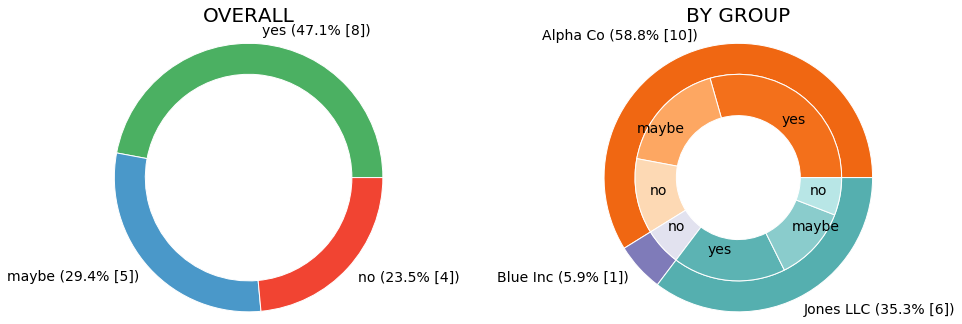

In [31]:
import os
file_needed = "donut_plot_with_total_summary_and_subgroups_from_dataframe.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/donut_plots_with_subgroups/master/donut_plot_with_total_summary_and_subgroups_from_dataframe.py
from donut_plot_with_total_summary_and_subgroups_from_dataframe import donut_plot_with_total_summary_and_subgroups_from_dataframe
p = donut_plot_with_total_summary_and_subgroups_from_dataframe(df=df,state4subgroup_col ="In_Stock",grouping_col="Manufacturer", hilolist=["yes", "maybe", "no"],advance_left_permute_increments = 5);

That is just a small example of the possibilities. There are other options for that script/function and related scripts as well.  
See about these donut plots [here](https://github.com/fomightez/donut_plots_with_subgroups).

---

The next notebook in the series addresses converting a dataframe or data table of text into a summary where the data only has two subgroups / states that you are concerned with, such as 'present/not present' or 'yes/no'.  
Continue on to the next part of the series by clicking [here &#10145;](demo_df_binary_states2summary_df.ipynb).

----
----